<a href="https://colab.research.google.com/github/fomia10/Practica-4/blob/main/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flores Martínez Icoquih Arzu

Flores Pradel Ana Karla

In [ ]:
import sympy as sp
# Ejercicio 1
#Metodo de Biseccion

def biseccion(funcion, a, b, tolerancia, max_iter):
   #Verificar que haya un cambio de signo en [a, b]

    if funcion(a) * funcion(b) > 0:
        return "el metodo de biseccion no puede aplicarse: no hay un cambio de signo"

    for i in range(max_iter):
        c = (a + b) / 2    #punto medio
        if abs(funcion(c)) < tolerancia:    #Comprobar si es raiz
            return f"Raiz encontrada: {c}"
        if funcion(a) * funcion(c) < 0:     #el cambio de signo esta en [a, c]
            b = c
        else:     #el cambio de signo esta en [c, b]
            a = c

    return f"No se encontro raiz tras {max_iter} iteraciones"

#metodo de Secante

def secante(funcion, x0, x1, tolerancia, max_iter):

    for i in range(max_iter):

        if abs(funcion(x1) - funcion(x0)) < 1e-10:     #evitar division por cero
            return "El metodo de secante no puede continuar: division por cero"

        x2 = x1 - funcion(x1) * (x1 - x0) / (funcion(x1) - funcion(x0))

        if abs(funcion(x2)) < tolerancia: #Comprobar si es raiz
            return f"Raiz encontrada: {x2}"
        x0, x1 = x1, x2  #Actualizar puntos

    return f"No se encontro raiz tras {max_iter} iteraciones"

#metodo de Newton
def newton(funcion_str, x0, tolerancia, max_iter):

    x = sp.symbols('x') #Declarar variable simbolica

    funcion = sp.sympify(funcion_str) #Convertir cadena a funcion simbolica
    derivada = sp.diff(funcion, x) #Derivar funcion
    for i in range(max_iter):
        fx0 = funcion.subs(x, x0)
        dfx0 = derivada.subs(x, x0)
        if abs(dfx0) < 1e-10: #Evitar division por cero
            return "El metodo de Newton no puede continuar: derivada cercana a cero"
        x1 = x0 - fx0 / dfx0 #Formula de Newton
        if abs(x1 - x0) < tolerancia: #Comprobar convergencia
            return f"Raiz encontrada: {x1}"
        x0 = x1 #Actualizar x0
    return f"No se encontro raiz tras {max_iter} iteraciones"

#metodo de Regla Falsa
def regla_falsa(funcion, a, b, tolerancia, max_iter):
    if funcion(a) * funcion(b) > 0:
        return "el metodo de regla falsa no puede aplicarse: no hay un cambio de signo"

    for i in range(max_iter):
        c = b - funcion(b) * (b - a) / (funcion(b) - funcion(a))  #Formula de Regla Falsa
        #Comprobar si es raiz
        if abs(funcion(c)) < tolerancia:
            return f"Raiz encontrada: {c}"
        if funcion(a) * funcion(c) < 0:  #el cambio de signo esta en [a, c]
            b = c
        else:  #el cambio de signo esta en [c, b]
            a = c
    return f"No se encontro raiz tras {max_iter} iteraciones"


funcion = lambda x: x**3 - x - 2

    #parametros iniciales que tambien se pueden cambiar con inputs con variable = input()
a, b = 1, 2
x0, x1 = 1, 2
tolerancia = 1e-5
max_iter = 100

print(biseccion(funcion, a, b, tolerancia, max_iter))
print(secante(funcion, x0, x1, tolerancia, max_iter))
print(newton("x**3 - x - 2", x0, tolerancia, max_iter))
print(regla_falsa(funcion, a, b, tolerancia, max_iter))


Raiz encontrada: 1.5213813781738281
Raiz encontrada: 1.5213797079848717
Raiz encontrada: 3347893610469619238964289382536890058711797776646485473325139169243018172214752458251922527982964550703086741150187442/2200564129714450582312089213182921603190479725499887047159240180441724550440323292821159071448658474367211601291468907
Raiz encontrada: 1.5213788584038939


In [ ]:
import math
#Ejercicio 2

def biseccion(funcion, a, b, tolerancia, max_iter=100):
    #Verificar cambio de signo
    if funcion(a) * funcion(b) > 0:
        return "No hay cambio de signo"

    for i in range(max_iter):
        c = (a + b) / 2  #Punto medio
        if abs(funcion(c)) < tolerancia:  #Comprobar si c es raiz
            return c
        if funcion(a) * funcion(c) < 0:  #Cambio de signo en [a, c]
            b = c
        else:  #Cambio de signo en [c, b]
            a = c
    return "No convergio en iteraciones"

#Funciones dadas
def funciona(x):
    return x - 2**(-x)

def funcionb(x):
    return math.exp(x) - x**2 + 3*x - 2

def funcion_c(x):
    return 2*x*math.cos(2*x) - (x + 1)**2

def funcion_d(x):
    return math.cos(x) - 2*x**2 + 3*x - 1

#Resolver cada caso
tolerancia = 1e-5
resultados = {}

#Caso (a)
resultados["a"] = biseccion(funciona, 0, 1, tolerancia)

#Caso (b)
resultados["b"] = biseccion(funcionb, 0, 1, tolerancia)

#Caso (c) dos intervalos
resultados["c1"] = biseccion(funcion_c, -3, -2, tolerancia)
resultados["c2"] = biseccion(funcion_c, -1, 0, tolerancia)

#Caso (d) dos intervalos
resultados["d1"] = biseccion(funcion_d, 0.2, 0.3, tolerancia)
resultados["d2"] = biseccion(funcion_d, 1.2, 1.3, tolerancia)

#mostrar resultados
for clave, valor in resultados.items():
  print(f"Raiz para caso", clave ,":", valor)


Raiz para caso a : 0.6411895751953125
Raiz para caso b : 0.25753021240234375
Raiz para caso c1 : -2.1913070678710938
Raiz para caso c2 : -0.7981605529785156
Raiz para caso d1 : No hay cambio de signo
Raiz para caso d2 : 1.2294555664062503


In [ ]:
#Ejercicio 4b
#metodo de Biseccion
def biseccion_sqrt(funcion, a, b, tolerancia, iteraciones=5):
    for i in range(iteraciones):
        c = (a + b) / 2  #Punto medio
        print(f"Iteracion {i + 1}: a={a}, b={b}, c={c}, f(c)={funcion(c)}")
        if abs(funcion(c)) < tolerancia:  #Verificar si es raiz
            return c
        if funcion(a) * funcion(c) < 0: #Cambio de signo en [a, c]
            b = c
        else: #Cambio de signo en [c, b]
            a = c
    return c

#Funcion a resolver
def funcion(x):
    return x**2 - 3

#Intervalo inicial
a = 1
b = 2
tolerancia = 1e-4

#programa completo
raiz = biseccion_sqrt(funcion, a, b, tolerancia, iteraciones=5)
print(f"Aproximacion tras 5 iteraciones:", raiz)


Iteracion 1: a=1, b=2, c=1.5, f(c)=-0.75
Iteracion 2: a=1.5, b=2, c=1.75, f(c)=0.0625
Iteracion 3: a=1.5, b=1.75, c=1.625, f(c)=-0.359375
Iteracion 4: a=1.625, b=1.75, c=1.6875, f(c)=-0.15234375
Iteracion 5: a=1.6875, b=1.75, c=1.71875, f(c)=-0.0458984375
Aproximacion tras 5 iteraciones: 1.71875


Iteracion 1: x0=0, x1=3.141592653589793, error=3.141592653589793
Iteracion 2: x0=3.141592653589793, x1=3.641592653589793, error=0.5
Iteracion 3: x0=3.641592653589793, x1=3.6260488644451154, error=0.015543789144677689
Iteracion 4: x0=3.6260488644451154, x1=3.626995622438735, error=0.0009467579936197623


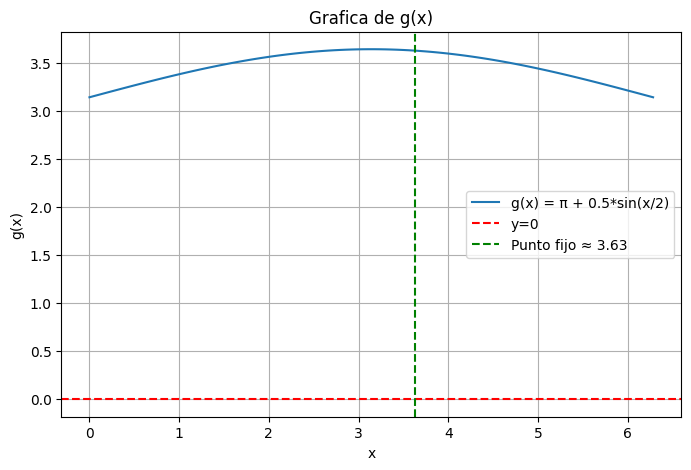

3.626995622438735

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Ejercicio 7
#metodo de Punto Fijo
def punto_fijo(g, x0, tolerancia, max_iter=100):
  for i in range(max_iter):
      x1 = g(x0)#Evaluar g(x0)
      print(f"Iteracion {i + 1}: x0={x0}, x1={x1}, error={abs(x1 - x0)}")

      if abs(x1 - x0) < tolerancia:     #Verificar convergencia
            return x1
        #Actualizar x0 para la siguiente iteracion
      x0 = x1

  return "No convergio"

#Funcion g(x)
def g(x):
    return np.pi + 0.5 * np.sin(x / 2)

#Parametros iniciales
x0 = 0     #Valor inicial
tolerancia = 1e-2

#Encontrar punto fijo
punto_fijo_resultado = punto_fijo(g, x0, tolerancia)

#Graficar g(x)
x_vals = np.linspace(0, 2 * np.pi, 100)
y_vals = g(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="g(x) = π + 0.5*sin(x/2)")
plt.axhline(y=0, color="red", linestyle="--", label="y=0")
plt.axvline(x=punto_fijo_resultado, color="green", linestyle="--", label=f"Punto fijo ≈ {punto_fijo_resultado:.2f}")
plt.title("Grafica de g(x)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()

plt.grid()
plt.show()

punto_fijo_resultado


In [ ]:
#Ejercicio 9
#metodo de Newton
def newton(funcion, derivada, x0, tolerancia, max_iter=100):
    resultados = []
    for i in range(max_iter):
        fx = funcion(x0)
        dfx = derivada(x0)
        if abs(dfx) < 1e-10:  #Evitar division por cero

            return resultados, "Derivada cercana a cero, metodo detenido"
        x1 = x0 - fx / dfx  #Calcular siguiente x
        resultados.append((i + 1, x0, x1, fx))
        if abs(x1 - x0) < tolerancia:  #Verificar convergencia
            return resultados, x1
        x0 = x1
    return resultados, "No convergio en iteraciones"

#Funciones y derivadas

def funcion_a(x):
    return np.exp(x) + 2 * np.cos(x) - 6

def derivada_a(x):
    return np.exp(x) - 2 * np.sin(x)

def funcion_b(x):
    return 2 * x * np.cos(2 * x) - (x - 2) ** 2

def derivada_b(x):
    return 2 * np.cos(2 * x) - 4 * x * np.sin(2 * x) - 2 * (x - 2)

def funcion_c(x):
    return np.exp(x) - 3 * x ** 2

def derivada_c(x):
    return np.exp(x) - 6 * x

#Resolucion de cada caso
tolerancia = 1e-5
x0_a = 1.5

resultados_a, raiz_a = newton(funcion_a, derivada_a, x0_a, tolerancia)

x0_b1, x0_b2 = 2.5, 3.5

resultados_b1, raiz_b1 = newton(funcion_b, derivada_b, x0_b1, tolerancia)
resultados_b2, raiz_b2 = newton(funcion_b, derivada_b, x0_b2, tolerancia)

x0_c1, x0_c2 = 0.5, 4.0

resultados_c1, raiz_c1 = newton(funcion_c, derivada_c, x0_c1, tolerancia)
resultados_c2, raiz_c2 = newton(funcion_c, derivada_c, x0_c2, tolerancia)

#mostrar resultados
def mostrar_resultados_newton(resultados, caso):
    print(f"Resultados Newton Caso {caso}:")
    print(f"{'Iteracion':<10}{'x0':<15}{'x1':<15}{'f(x0)':<15}")

#Imprimir todas las iteraciones
    print("\n".join(
        f"{iteracion[0]:<10}{iteracion[1]:<15.8f}{iteracion[2]:<15.8f}{iteracion[3]:<15.8f}"
        for iteracion in resultados
    ))
    print()


mostrar_resultados_newton(resultados_a, "a")
mostrar_resultados_newton(resultados_b1, "b1")
mostrar_resultados_newton(resultados_b2, "b2")
mostrar_resultados_newton(resultados_c1, "c1")
mostrar_resultados_newton(resultados_c2, "c2")


Resultados Newton Caso a:
Iteracion x0             x1             f(x0)          
1         1.50000000     2.05368039     -1.37683653    
2         2.05368039     1.90964061     0.86787188     
3         1.90964061     1.89198830     0.08586764     
4         1.89198830     1.89174595     0.00114745     
5         1.89174595     1.89174591     0.00000021     

Resultados Newton Caso b1:
Iteracion x0             x1             f(x0)          
1         2.50000000     2.37240732     1.16831093     
2         2.37240732     2.37068783     0.01513958     
3         2.37068783     2.37068692     0.00000799     

Resultados Newton Caso b2:
Iteracion x0             x1             f(x0)          
1         3.50000000     3.78319116     3.02731578     
2         3.78319116     3.72416540     -1.03355918    
3         3.72416540     3.72211550     -0.03350944    
4         3.72211550     3.72211277     -0.00004441    

Resultados Newton Caso c1:
Iteracion x0             x1             f(x0)     

In [ ]:
#Ejercicio 10
#metodo de Secante
def secante(funcion, x0, x1, tolerancia, max_iter=100):
    resultados = []
    for i in range(max_iter):
        fx0 = funcion(x0)
        fx1 = funcion(x1)
        if abs(fx1 - fx0) < 1e-10:  #evitar division por cero
            return resultados, "Diferencia cercana a cero, metodo detenido"
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)#Calcular siguiente x
        resultados.append((i + 1, x0, x1, x2, fx1))
        if abs(x2 - x1) < tolerancia:#Verificar convergencia
            return resultados, x2
        x0, x1 = x1, x2
    return resultados, "No convergio en iteraciones"

#Resolucion de cada caso
tolerancia = 1e-5

x0_a_secante, x1_a_secante = 1.0, 2.0

resultados_a_secante, raiz_a_secante = secante(funcion_a, x0_a_secante, x1_a_secante, tolerancia)

x0_b1_secante, x1_b1_secante = 2.0, 3.0
x0_b2_secante, x1_b2_secante = 3.0, 4.0

resultados_b1_secante, raiz_b1_secante = secante(funcion_b, x0_b1_secante, x1_b1_secante, tolerancia)
resultados_b2_secante, raiz_b2_secante = secante(funcion_b, x0_b2_secante, x1_b2_secante, tolerancia)

x0_c1_secante, x1_c1_secante = 0.0, 1.0
x0_c2_secante, x1_c2_secante = 3.0, 5.0

resultados_c1_secante, raiz_c1_secante = secante(funcion_c, x0_c1_secante, x1_c1_secante, tolerancia)
resultados_c2_secante, raiz_c2_secante = secante(funcion_c, x0_c2_secante, x1_c2_secante, tolerancia)

#Mostrar resultados
def mostrar_resultados_secante(resultados, caso):
    print(f"Resultados Secante Caso {caso}:")
    print(f"{'Iteracion':<10}{'x0':<15}{'x1':<15}{'x2':<15}{'f(x1)':<15}")

    for iteracion in resultados:
        print(f"{iteracion[0]:<10}{iteracion[1]:<15.8f}{iteracion[2]:<15.8f}{iteracion[3]:<15.8f}{iteracion[4]:<15.8f}")

    print()

mostrar_resultados_secante(resultados_a_secante, "a")
mostrar_resultados_secante(resultados_b1_secante, "b1")

mostrar_resultados_secante(resultados_b2_secante, "b2")
mostrar_resultados_secante(resultados_c1_secante, "c1")
mostrar_resultados_secante(resultados_c2_secante, "c2")


Resultados Secante Caso a:
Iteracion x0             x1             x2             f(x1)          
1         1.00000000     2.00000000     1.79811912     0.55676243     
2         2.00000000     1.79811912     1.88403113     -0.41246050    
3         1.79811912     1.88403113     1.89232153     -0.03629908    
4         1.88403113     1.89232153     1.89174249     0.00272563     
5         1.89232153     1.89174249     1.89174591     -0.00001617    

Resultados Secante Caso b1:
Iteracion x0             x1             x2             f(x1)          
1         2.00000000     3.00000000     2.35448992     4.76102172     
2         3.00000000     2.35448992     2.37314878     -0.14171667    
3         2.35448992     2.37314878     2.37067412     0.02166939     
4         2.37314878     2.37067412     2.37068691     -0.00011260    
5         2.37067412     2.37068691     2.37068692     -0.00000009    

Resultados Secante Caso b2:
Iteracion x0             x1             x2             f(x1)   

In [ ]:
#Ejercicio 11
#Definir el polinomio y su derivada
def polinomio(x):
    return 230 * x**4 + 18 * x**3 + 9 * x**2 - 221 * x - 9

#La derivada del polinomio fue calculada manualmente:
#P'(x) = d/dx [230x^4 + 18x^3 + 9x^2 - 221x - 9]
#      = 920x^3 + 54x^2 + 18x - 221
def derivada_polinomio(x):
    return 920 * x**3 + 54 * x**2 + 18 * x - 221

#Metodo de Secante
def secante(funcion, x0, x1, tolerancia, max_iter=100):
    iteraciones = []

    for i in range(max_iter):
        fx0 = funcion(x0)
        fx1 = funcion(x1)

        if abs(fx1 - fx0) < 1e-10: #evitar division por cero
            return iteraciones, "Diferencia cercana a cero, metodo detenido"
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)#Calcular siguiente x
        iteraciones.append([i + 1, x0, x1, x2, fx1])

        if abs(x2 - x1) < tolerancia: #Verificar convergencia
            return iteraciones, x2
        x0, x1 = x1, x2

    return iteraciones, "No convrrgio en iteraciones"

#Metodo de Newton
def newton(funcion, derivada, x0, tolerancia, max_iter=100):
    iteraciones = []
    for i in range(max_iter):
        fx = funcion(x0)
        dfx = derivada(x0)

        if abs(dfx) < 1e-10: #evitar division por cero
            return iteraciones, "Derivada cercana a cero entonces se metodo detenido"
        x1 = x0 - fx / dfx  #Calcular siguiente x
        iteraciones.append([i + 1, x0, x1, fx])

        if abs(x1 - x0) < tolerancia:  #Verificar convergencia
            return iteraciones, x1
        x0 = x1

    return iteraciones, "No convergio en iteraciones"

#Parametros iniciales
tolerancia = 1e-6

#Intervalos para Secante
x0_secante1, x1_secante1 = -1.0, 0.0
x0_secante2, x1_secante2 = 0.0, 1.0

#Intervalos para Newton
x0_newton1 = -0.5  #Valor inicial en [-1, 0]
x0_newton2 = 0.5   #Valor inicial en [0, 1]

#Resolver usando Secante
resultados_secante1, raiz_secante1 = secante(polinomio, x0_secante1, x1_secante1, tolerancia)
resultados_secante2, raiz_secante2 = secante(polinomio, x0_secante2, x1_secante2, tolerancia)

#Resolver usando Newton
resultados_newton1, raiz_newton1 = newton(polinomio, derivada_polinomio, x0_newton1, tolerancia)
resultados_newton2, raiz_newton2 = newton(polinomio, derivada_polinomio, x0_newton2, tolerancia)

#Funcion para mostrar resultados de Secante
def mostrar_resultados_secante(iteraciones, caso):
    print(f"Resultados Secante {caso}:")
    print(f"{'Iteracion':<10}{'x0':<15}{'x1':<15}{'x2':<15}{'f(x1)':<15}")

    for iteracion in iteraciones:
        print(f"{iteracion[0]:<10}{iteracion[1]:<15.8f}{iteracion[2]:<15.8f}{iteracion[3]:<15.8f}{iteracion[4]:<15.8f}")
    print()

#Funcion para mostrar resultados de Newton
def mostrar_resultados_newton(iteraciones, caso):
    print(f"Resultados Newton {caso}:")
    print(f"{'Iteracion':<10}{'x0':<15}{'x1':<15}{'f(x0)':<15}")

    for iteracion in iteraciones:
        print(f"{iteracion[0]:<10}{iteracion[1]:<15.8f}{iteracion[2]:<15.8f}{iteracion[3]:<15.8f}")
    print()

#Mostrar resultados para Secante
print("Raices con el metodo de Secante:")

mostrar_resultados_secante(resultados_secante1, "Intervalo [-1, 0]")
mostrar_resultados_secante(resultados_secante2, "Intervalo [0, 1]")

#mostrar resultados para Newton
print("Raices con el metodo de Newton:")

mostrar_resultados_newton(resultados_newton1, "Intervalo [-1, 0]")
mostrar_resultados_newton(resultados_newton2, "Intervalo [0, 1]")


Raices con el metodo de Secante:
Resultados Secante Intervalo [-1, 0]:
Iteracion x0             x1             x2             f(x1)          
1         -1.00000000    0.00000000     -0.02036199    -9.00000000    
2         0.00000000     -0.02036199    -0.04069126    -4.49638093    
3         -0.02036199    -0.04069126    -0.04065926    0.00708748     
4         -0.04069126    -0.04065926    -0.04065929    -0.00000571    

Resultados Secante Intervalo [0, 1]:
Iteracion x0             x1             x2             f(x1)          
1         0.00000000     1.00000000     0.25000000     27.00000000    
2         1.00000000     0.25000000     0.77376277     -62.50781250   
3         0.25000000     0.77376277     -1.28541778    -83.83052028   
4         0.77376277     -1.28541778    0.59459552     879.63898561   
5         -1.28541778    0.59459552     0.39464110     -104.69138948  
6         0.59459552     0.39464110     -0.66931814    -88.12894036   
7         0.39464110     -0.66931814   

In [ ]:
import numpy as np
# Ejercicio 12
#Definir el sistema de ecuaciones
def sistema(I, phi, delta):
  F1 = I * np.cos(phi) - 2 / 3
  F2 = np.cos(delta) + 0.91 * I * np.sin(phi + delta) - 1.22
  F3 = 0.76 * I * np.cos(phi + delta) - np.sin(delta)

  return np.array([F1, F2, F3])

#Definir el Jacobiano
def jacobiano(I, phi, delta):
    J = np.zeros((3, 3))



    #Derivadas parciales para cada ecuacion
    J[0, 0] = np.cos(phi)
    J[0, 1] = -I * np.sin(phi)
    J[0, 2] = 0

    J[1, 0] = 0.91 * np.sin(phi + delta)
    J[1, 1] = 0.91 * I * np.cos(phi + delta)
    J[1, 2] = -np.sin(delta) + 0.91 * I * np.cos(phi + delta)

    J[2, 0] = 0.76 * np.cos(phi + delta)
    J[2, 1] = -0.76 * I * np.sin(phi + delta)
    J[2, 2] = -0.76 * I * np.sin(phi + delta) - np.cos(delta)
    return J

#Metodo de Newton para sistemas
def newton_sistemas(sistema, jacobiano, inicial, tolerancia=1e-6, max_iter=100):
    x = np.array(inicial, dtype=float)  #Vector inicial
    for i in range(max_iter):
        F = sistema(*x)
        J = jacobiano(*x)
        delta_x = np.linalg.solve(J, -F)  #Resolver J * delta_x = -F
        x = x + delta_x     #Actualizar variables
        if np.linalg.norm(delta_x) < tolerancia:    #Verificar convergencia
            return x, i + 1
    return x, "No convergio"

#Verificar admisibilidad de la solucion
def verificar_admisibilidad(I, phi, delta):
    restricciones = {
        "I > 0": I > 0,
        "0 <= phi <= pi/2": 0 <= phi <= np.pi / 2,
        "0 <= delta <= pi/2": 0 <= delta <= np.pi / 2,
    }
    return all(restricciones.values()), restricciones

#Condiciones iniciales
inicial_a = [1, 0.1, 0.1]
inicial_b = [1, 1, 1]

#Resolver sistema
solucion_a, iteraciones_a = newton_sistemas(sistema, jacobiano, inicial_a)
solucion_b, iteraciones_b = newton_sistemas(sistema, jacobiano, inicial_b)

#Verificar admisibilidad
admisibilidad_a, restricciones_a = verificar_admisibilidad(*solucion_a)
admisibilidad_b, restricciones_b = verificar_admisibilidad(*solucion_b)

#Mostrar resultados
print("Resultados para las condiciones iniciales (a):")

print(f"Solucion: I = {solucion_a[0]:.6f}, phi = {solucion_a[1]:.6f}, delta = {solucion_a[2]:.6f}")
print(f"Iteraciones: {iteraciones_a}")


print(f"Admisibilidad: {'Admisible' if admisibilidad_a else 'No Admisible'}")
print(f"Restricciones: {restricciones_a}")

print("\nResultados para las condiciones iniciales (b):")
print(f"Solucion: I = {solucion_b[0]:.6f}, phi = {solucion_b[1]:.6f}, delta = {solucion_b[2]:.6f}")
print(f"Iteraciones: {iteraciones_b}")

print(f"Admisibilidad: {'Admisible' if admisibilidad_b else 'No Admisible'}")
print(f"Restricciones: {restricciones_b}")


Resultados para las condiciones iniciales (a):
Solucion: I = 0.670131, phi = 0.101728, delta = 0.448941
Iteraciones: 5
Admisibilidad: Admisible
Restricciones: {'I > 0': True, '0 <= phi <= pi/2': True, '0 <= delta <= pi/2': True}

Resultados para las condiciones iniciales (b):
Solucion: I = -0.670131, phi = -3.039864, delta = 0.448941
Iteraciones: 9
Admisibilidad: No Admisible
Restricciones: {'I > 0': False, '0 <= phi <= pi/2': False, '0 <= delta <= pi/2': True}


In [ ]:
import numpy as np

#Ejercicio 13
#Metodo de Newton para sistemas no lineales
def newton_sistemas_multivariables(funciones, jacobiano, inicial, tolerancia=1e-6, max_iter=100):
    x = np.array(inicial, dtype=float)    #Vector inicial
    for i in range(max_iter):
        F = np.array([f(*x) for f in funciones]) #Evaluar funciones
        J = np.array([[df(*x) for df in fila] for fila in jacobiano]) #Evaluar Jacobiano
        try:
            delta_x = np.linalg.solve(J, -F)  #Resolver sistema lineal
        except np.linalg.LinAlgError:
            return x, "Matriz singular, no se puede continuar"
        x = x + delta_x     #Actualizar variables
        if np.linalg.norm(delta_x) < tolerancia:  #Verificar convergencia
            return x, i + 1
    return x, "No convergio"

#Sistema (a)
def F1_a(x1, x2):
    return x1 + x2 * (x2 * (5 - x2) - 2) - 13

def F2_a(x1, x2):
    return x1 + x2 * (x2 * (1 + x2) + 14) - 29

def J11_a(x1, x2):
    return 1

def J12_a(x1, x2):
    return 2 * x2 * (5 - x2) - 2 - x2**2

def J21_a(x1, x2):
    return 1

def J22_a(x1, x2):
    return 2 * x2 * (1 + x2) + 14 + 2 * x2

#Sistema (b)
def F1_b(x1, x2, x3):
    return x1**2 + x2**2 + x3**2 - 5

def F2_b(x1, x2, x3):
    return x1 + x2 - 1

def F3_b(x1, x2, x3):
    return x1 + x3 - 3

def J11_b(x1, x2, x3):
    return 2 * x1

def J12_b(x1, x2, x3):
    return 2 * x2

def J13_b(x1, x2, x3):
    return 2 * x3

def J21_b(x1, x2, x3):
    return 1

def J22_b(x1, x2, x3):
    return 1

def J23_b(x1, x2, x3):
    return 0

def J31_b(x1, x2, x3):
    return 1

def J32_b(x1, x2, x3):
    return 0

def J33_b(x1, x2, x3):
    return 1

#Resolver sistema (a)
funciones_a = [F1_a, F2_a]
jacobiano_a = [[J11_a, J12_a], [J21_a, J22_a]]
inicial_a = [15, -2]

solucion_a, iteraciones_a = newton_sistemas_multivariables(funciones_a, jacobiano_a, inicial_a)

#Resolver sistema (b)
funciones_b = [F1_b, F2_b, F3_b]
jacobiano_b = [[J11_b, J12_b, J13_b], [J21_b, J22_b, J23_b], [J31_b, J32_b, J33_b]]
inicial_b = [(1 + np.sqrt(3)) / 2, (1 - np.sqrt(3)) / 2 + 0.01, np.sqrt(3)]  #Perturbacion en x2

solucion_b, iteraciones_b = newton_sistemas_multivariables(funciones_b, jacobiano_b, inicial_b)

#Mostrar resultados
print("Resultados para el sistema (a):")
print(f"Solucion: x1 = {solucion_a[0]:.6f}, x2 = {solucion_a[1]:.6f}")
print(f"Iteraciones: {iteraciones_a}")

print("\nResultados para el sistema (b):")
print(f"Solucion: x1 = {solucion_b[0]:.6f}, x2 = {solucion_b[1]:.6f}, x3 = {solucion_b[2]:.6f}")
print(f"Iteraciones: {iteraciones_b}")


Resultados para el sistema (a):
Solucion: x1 = 10.265301, x2 = 1.139681
Iteraciones: 8

Resultados para el sistema (b):
Solucion: x1 = 1.000000, x2 = -0.000000, x3 = 2.000000
Iteraciones: 11
